# Анализ

In [ ]:
import seaborn as sns

In [ ]:
dfTrain.quantile([0.25, 0.50, 0.75, 0.95, 1.])

,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,...,Время засыпания,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
0.25,0.0,0.0,1.0,13.0,5.0,2.0,2.0,0.0,0.0,0.0,...,7.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.50,0.0,0.0,1.0,13.0,5.0,2.0,5.0,1.0,0.0,0.0,...,22.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.75,1.0,2.0,1.0,13.0,5.0,3.0,8.0,1.0,1.0,0.0,...,25.0,29.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0.95,1.0,3.0,1.0,13.0,5.0,3.0,10.0,1.0,1.0,0.0,...,26.0,32.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1.00,2.0,5.0,2.0,19.0,5.0,3.0,10.0,1.0,1.0,1.0,...,28.0,37.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


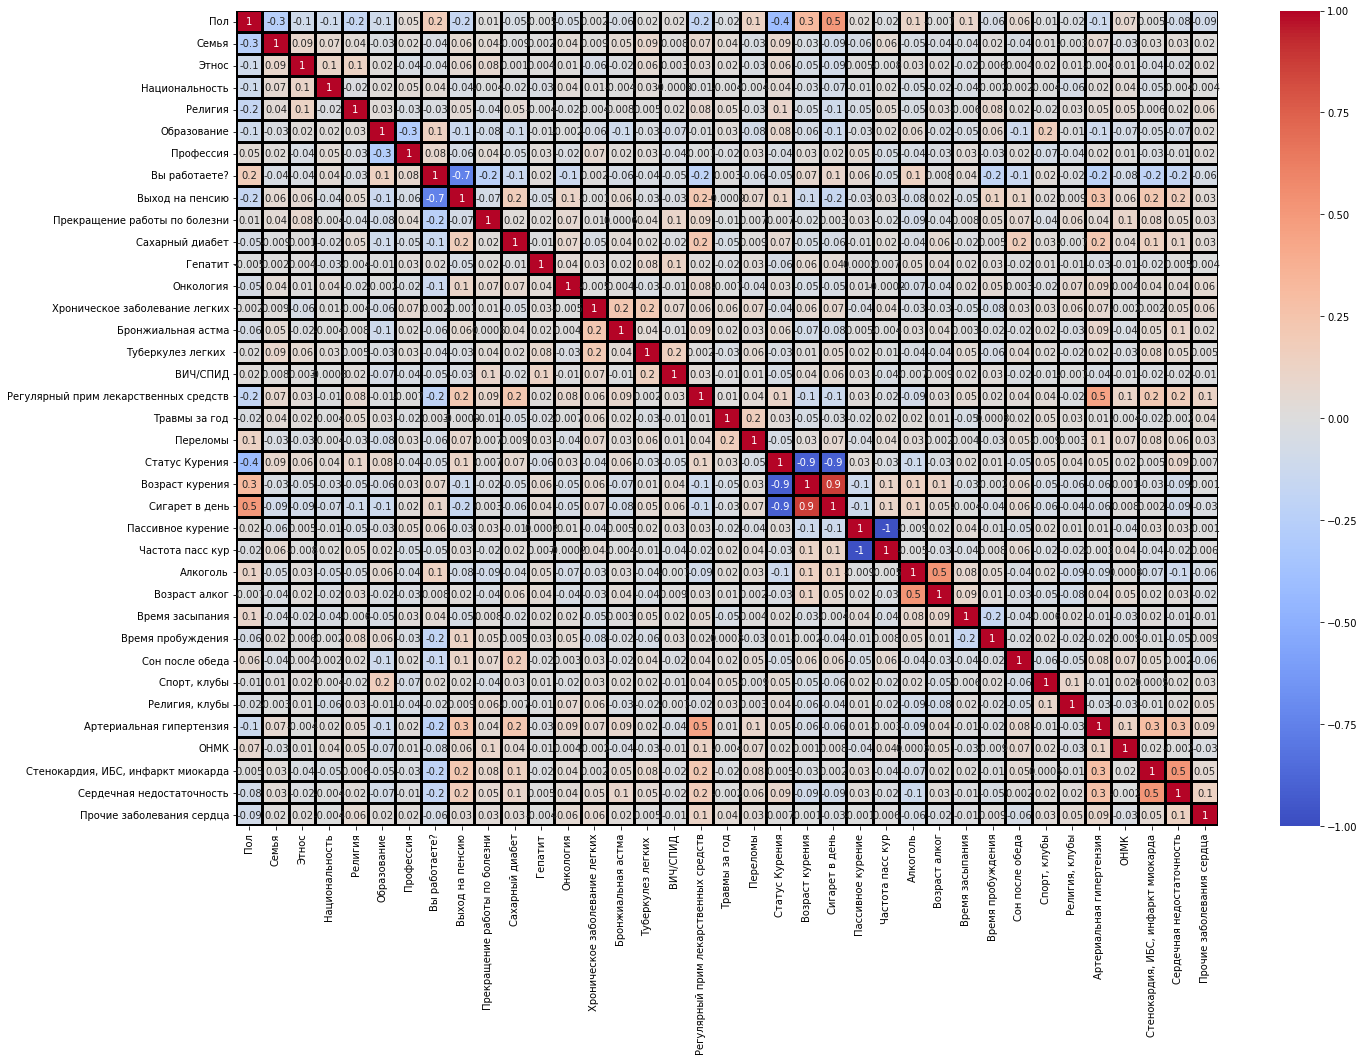

In [ ]:
###   КОРРЕЛЯЦИЯ
# Метод, подсчитывающий попарную корреляцию для элементов.
corr_matrix = dfTrain.corr('spearman') 

# Можно указать в параметрах способ подсчета.
plt.figure(figsize=(22, 15))
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g') 

plt.show()

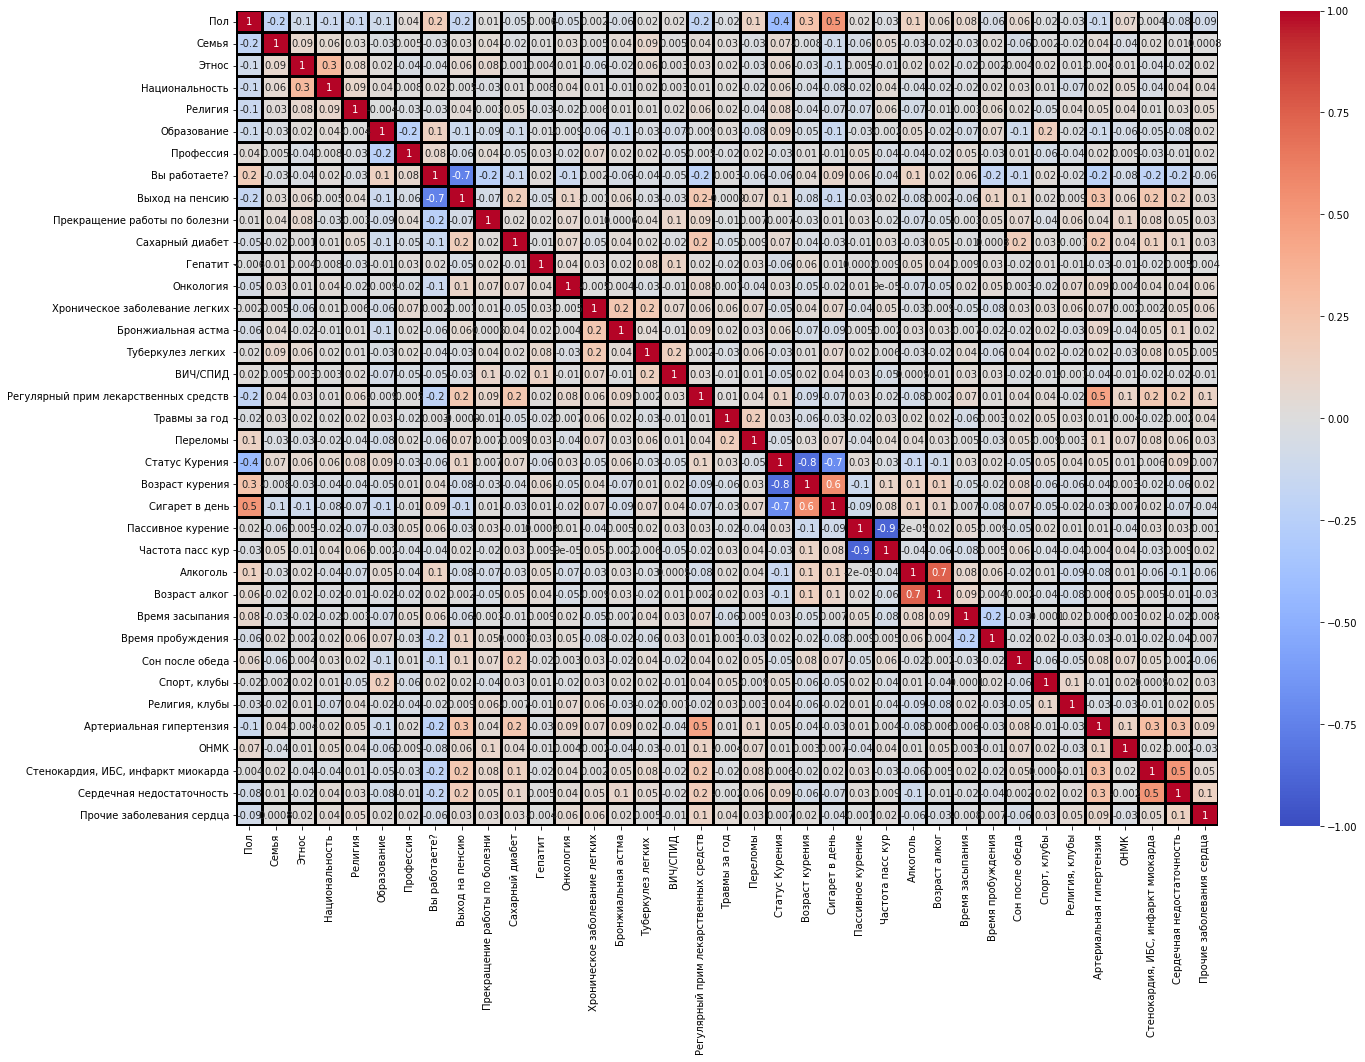

In [ ]:
###   КОРРЕЛЯЦИЯ
# Метод, подсчитывающий попарную корреляцию для элементов.
corr_matrix = dfTrain.corr() 

# Можно указать в параметрах способ подсчета.
plt.figure(figsize=(22, 15))
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g') 

plt.show()

# Загружаем Модель

In [ ]:
import Service
import MODEL

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 9)]          0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 32)           320         ['input_4[0][0]']                
                                                                                                  
 batch_normalization_39 (BatchN  (None, 32)          128         ['dense_12[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 activation_39 (Activation)     (None, 32)           0           ['batch_normalization_39[0]

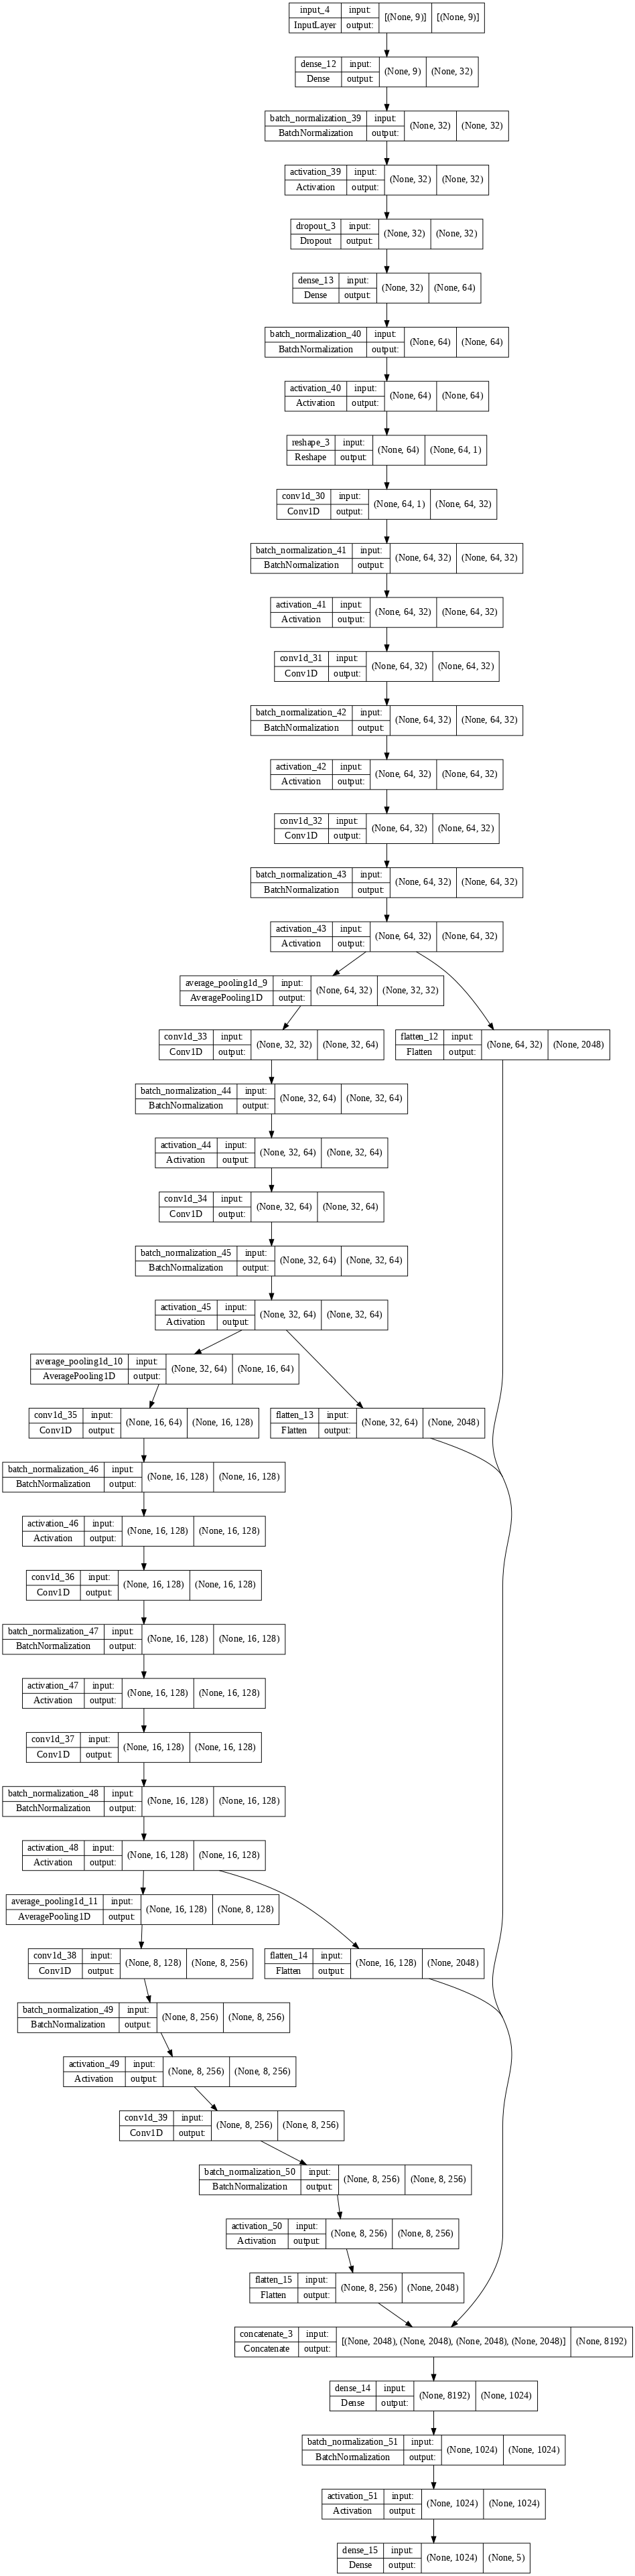

In [ ]:
model = MODEL.create_Conv1_D()
model.load_weights('weights_modelAll_recall80.h5') ## > Score = 0.699778
model.summary()
print()
plot_model(model, dpi=70, show_shapes=True )

# Используем Модель

In [ ]:
predict = Service.predictSampling(model, XTest)

Sampling.shape  (638, 9)


In [ ]:
print("Получаем размерность ", predict.shape)
predict

Получаем размерность  (638, 5)


array([[1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)